In [ ]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"lavan06","key":"43febc1c74ddc5973167bfee123931b9"}'}

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

!unzip corn-or-maize-leaf-disease-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset
License(s): copyright-authors
corn-or-maize-leaf-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  corn-or-maize-leaf-disease-dataset.zip
replace data/Blight/Corn_Blight (1).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: User cancelled operation
Archive:  corn-or-maize-leaf-disease-dataset.zip
replace data/Blight/Corn_Blight (1).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
import tensorflow as tt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = train_datagen.flow_from_directory('/content/data',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='training')
val_generator = train_datagen.flow_from_directory('/content/data',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='validation')

Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [16]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 3)),layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(4, activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print(class_indices)
print(class_names)

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}
['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)


Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.6753 - loss: 0.8499 - val_accuracy: 0.8134 - val_loss: 0.4685
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.8312 - loss: 0.4037 - val_accuracy: 0.8278 - val_loss: 0.3714
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.8628 - loss: 0.3294 - val_accuracy: 0.8828 - val_loss: 0.2881
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.8914 - loss: 0.2629 - val_accuracy: 0.8708 - val_loss: 0.2783
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.9188 - loss: 0.2133 - val_accuracy: 0.8756 - val_loss: 0.3021


In [19]:
model.save('plantleaf.h5')

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model =load_model('plantleaf.h5')
print("Model Loaded")

Model Loaded


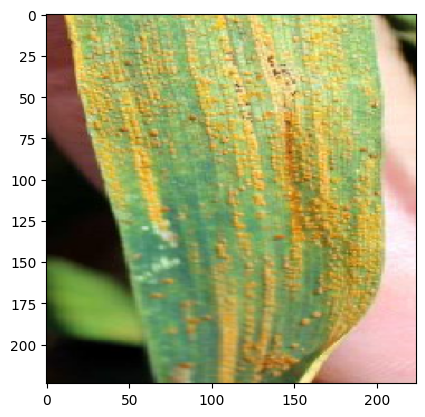

In [23]:
test_image_path="/content/data/Common_Rust/Corn_Common_Rust (1).jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [24]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
[[0.24924822 0.25457603 0.23256278 0.263613  ]]


In [25]:
ind=np.argmax(prediction)
print(class_names[ind])

Healthy


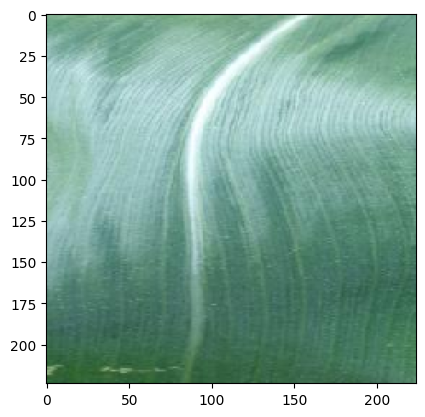

In [26]:
test_image_path="/content/data/Healthy/Corn_Health (1).jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [27]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0.24879293 0.2501206  0.23072572 0.2703608 ]]


In [28]:
ind=np.argmax(prediction)
print(class_names[ind])

Healthy
